<h1>DA Tools 1 Final Project</h1>
<h3>Walter Meeker, Cortland McHale, Ryan Wilson</h3>

<h2>Bejing Air Quality Data Cleaning and Analysis</h2>

<h3>Data Motivation</h3>
<p>The Bejing air quality data was chosen by our team after an extensive search of datasets that had a large amount of missing or unclean data to demonstrate data science techniques for cleaning data. The dataset provided several attributes that made for interesting analysis including that it was time series, was from 12 different geographical locations, and contained both weather and pollution attributes. The issue of pollution and climate change is also a subject of great importance and personal interest to our team.</p>

<h3>Meta Data Description</h3>
<p>
The data source was Source: UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data.</p>
Hourly weather and pollution data from 12 Beijing stations (separate csv files for each station) <br>
Date Range: 3/1/2013 - 2/28/2017<br>
420,768 rows x 18 columns <br><br>

Date fields:
<ul>
<li>year: year of data in this row</li>
<li>month: month of data in this row</li>
<li>day: day of data in this row</li>
<li>hour: hour of data in this row</li>
<li>station: name of the air-quality monitoring site</li>
</ul>
Air quality fields:
<ul>
<li>PM2.5: PM2.5 concentration (ug/m^3) - particulate matter < 2.5 microns</li>
<li>PM10: PM10 concentration (ug/m^3) - particulate matter < 10 microns</li>
<li>SO2: SO2 concentration (ug/m^3)</li>
<li>NO2: NO2 concentration (ug/m^3)</li>
<li>CO: CO concentration (ug/m^3)</li>
<li>O3: O3 concentration (ug/m^3)</li>
</ul>
Weather fields: 
<ul>
<li>TEMP: temperature (degree Celsius)</li>
<li>PRES: pressure (hPa)</li>
<li>DEWP: dew point temperature (degree Celsius)</li>
<li>RAIN: precipitation (mm)</li>
<li>WSPM: wind speed (m/s)</li>
<li>wd: wind direction (categorical) *</li>
</ul>
*wind direction is the only categorial field. 

</p>

<h3>Literature Review</h3>
https://royalsocietypublishing.org/doi/full/10.1098/rspa.2017.0457#d21448504e1<br>
<p>Intial research on this data was an article "Cautionary tales on air-quality improvement in Beijing" by Shuyi Zhang, Bin Guo, Anlan Dong, Jing He, Ziping Xu and Song Xi Chen. The research conducted the spatially and temporally meteorological adjustment of the weather data and ran statistical analysis on the relationship between PM2.5 and meteorological variables. The researches found no significant decrease in pollution compared to the official government reports of a 9% decrease.  We will not seek to reproduce anything in this study. The authors have deep subject matter expertise in climate data. Our project will focus more on use of python to clean, manipulate, analyze, and visualize the data. </p>

In [1]:
#load packages and download data

import pandas as pd
import os
import glob
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import copy
import matplotlib.pyplot as plt
import numpy as np

#If data is not downloaded, download and unzip
if not os.path.isdir('PRSA_Data_20130301-20170228'):
    print("downloading data")
    zipurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'
    with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            zfile.extractall('./')
else:
    print("data already downloaded")

#Create dic off all files/city dataframe. example: dic['Aotizhongxin']

csv_files = glob.glob(os.path.join('PRSA_Data_20130301-20170228', "*.csv"))
dic={}
for f in csv_files:
    city=f.split("_")[4]
    dic[city] = pd.read_csv(f)
    
    #Convert invidual time fields to datetime. Drop unnessary columns 
    
    dic[city]['datetime']=pd.to_datetime(dic[city][['year', 'month', 'day', 'hour']])
    dic[city].drop(columns=['No','year', 'month', 'day', 'hour'], inplace=True)
    dic[city].index=dic[city]['datetime']
    
    # set binary signal for PM2.5 levels, if over 35 == 1 == unsafe
    
    dic[city]['PM2.5 Sig'] = np.where(dic[city]['PM2.5'] >= 35, 1, 0)

data already downloaded


<h1>Data Cleaning and Prep </h1>
<p>This data had many missing values. First we examine the number of missing values by station and field.</p>

In [2]:
#create df sum of NaN values per city/file
df_na = pd.DataFrame(index=[dic['Aotizhongxin'].columns])
for k in dic.keys():
    ser=dic[k].isna().sum()
    df_na[k]=ser.values
    
df_na

Aotizhongxin  Changping  Dingling  Dongsi  Guanyuan  Gucheng  \
PM2.5               925        774       779     750       616      646   
PM10                718        582       656     553       429      381   
SO2                 935        628       730     663       474      507   
NO2                1023        667      1234    1601       659      668   
CO                 1776       1521      2012    3197      1753     1401   
O3                 1719        604      1214     664      1173      729   
TEMP                 20         53        53      20        20       51   
PRES                 20         50        50      20        20       50   
DEWP                 20         53        53      20        20       51   
RAIN                 20         51        51      20        20       43   
wd                   81        140       140      78        81      159   
WSPM                 14         43        43      14        14       42   
station               0          0         0       0         0        0   
datetime              0          0         0       0         0        0   
PM2.5 Sig             0          0         0       0         0        0   

           Huairou  Nongzhanguan  Shunyi  Tiantan  Wanliu  Wanshouxigong  
PM2.5          953           628     913      677     382            696  
PM10           777           440     548      597     284            484  
SO2            980           446    1296     1118     575            669  
NO2           1639           692    1365      744    1070            754  
CO            1422          1206    2178     1126    1812           1297  
O3            1151           506    1489      843    2107           1078  
TEMP            51            20      51       20      20             19  
PRES            53            20      51       20      20             19  
DEWP            53            20      54       20      20             19  
RAIN            55            20      51       20      20             19  
wd             302            78     483       78     123             79  
WSPM            49            14      44       14      14             13  
station          0             0       0        0       0              0  
datetime         0             0       0        0       0              0  
PM2.5 Sig        0             0       0        0       0              0

In [3]:
#total NaN by city/file
df_na.sum()

Aotizhongxin     7271
Changping        5166
Dingling         7015
Dongsi           7600
Guanyuan         5279
Gucheng          4728
Huairou          7485
Nongzhanguan     4090
Shunyi           8523
Tiantan          5277
Wanliu           6447
Wanshouxigong    5146
dtype: int64

<h3>Cleaning Analysis</h3>

<p>Our takeaways here are that pollution metrics have the most missing data. Weather data has some gaps but much smaller. Each station has a similar amount of missing data. Each station's pollution metrics have a different number of missing rows, indicating there are not consistent blocks of time that all data is missing. The gaps are different for each station and each field. Our next step, we visualized the missing data for each station and field. We created new dataframes where NaN is converted to 1 and non null is 0. This allows us to chart the count of missing values over time. </p>

<h4>The following sections have many repetitive charts. The casual reader may scroll through to the next text section. All charts are included here to show our cleaning process</h4>


In [4]:
#create dfs with 1 for all NaN values to plot NaN trends
na_dic= copy.deepcopy(dic)
for k in na_dic.keys():
    na_dic[k].index=na_dic[k]['datetime']
    na_dic[k]=na_dic[k].isna().astype('int')

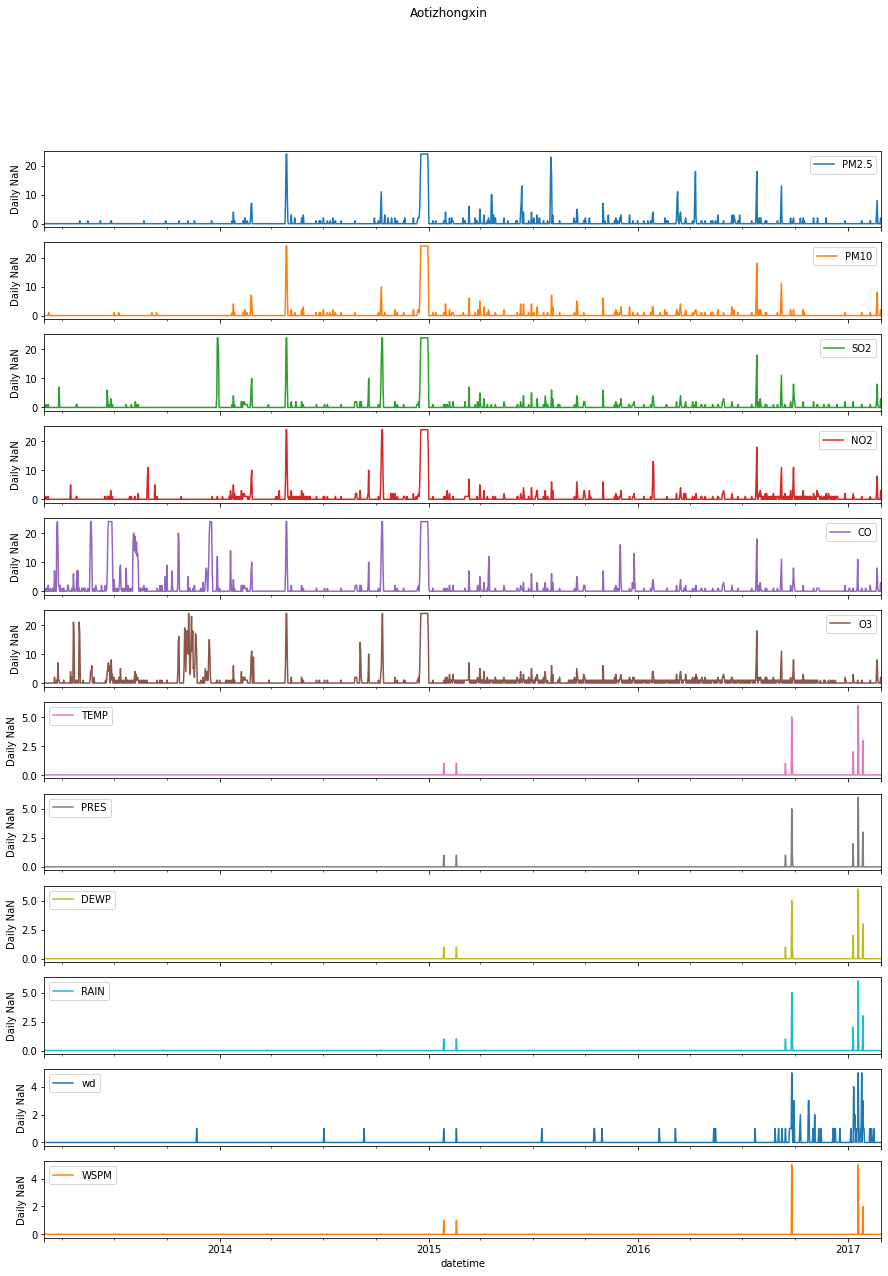

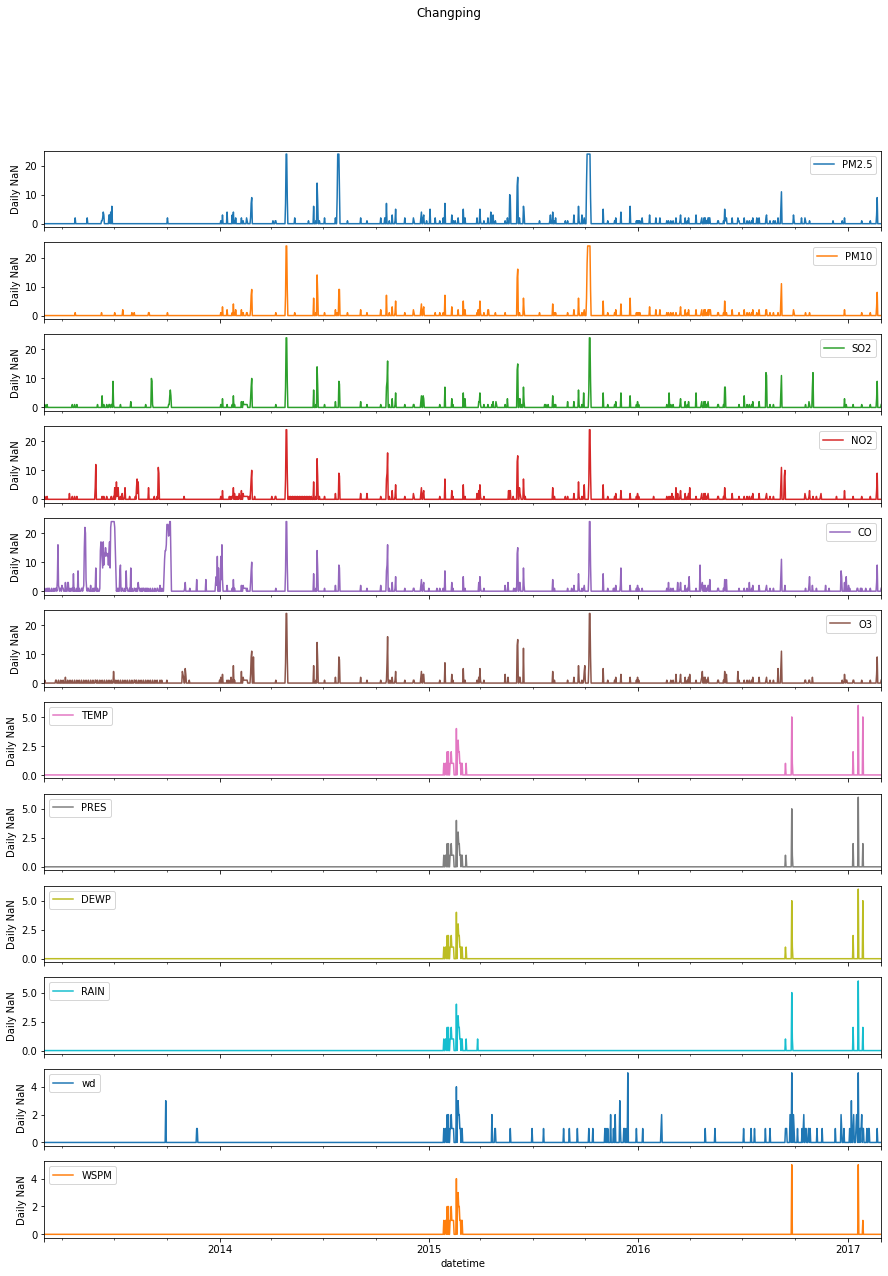

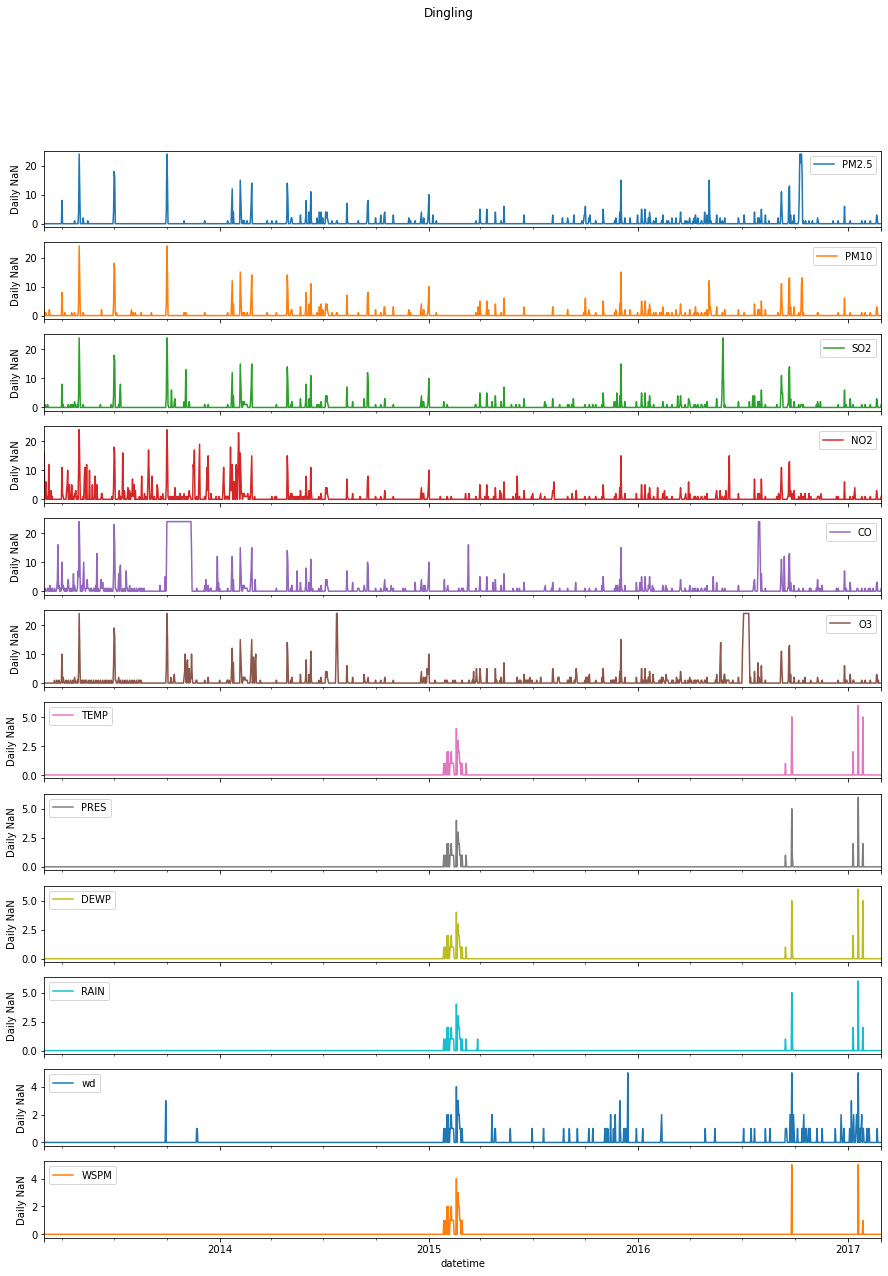

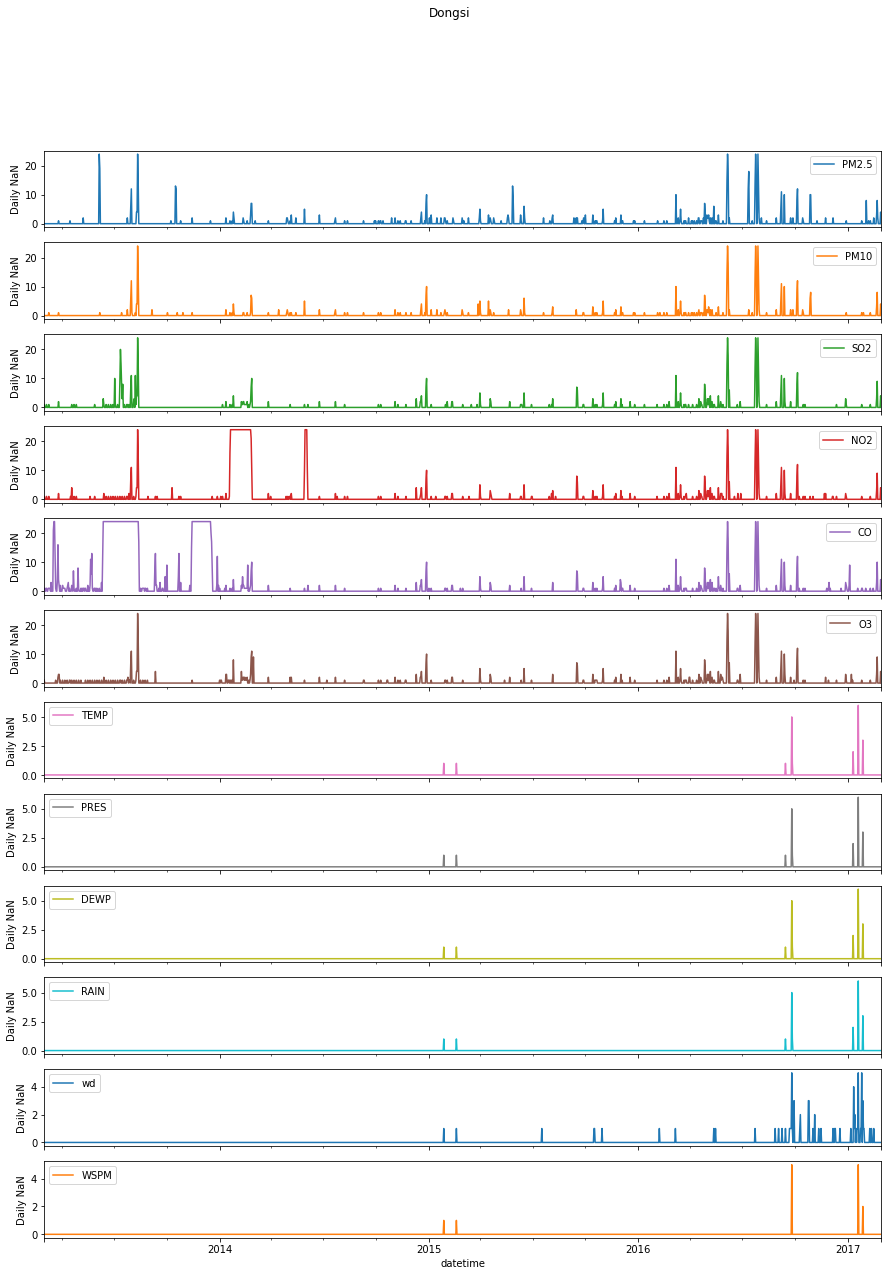

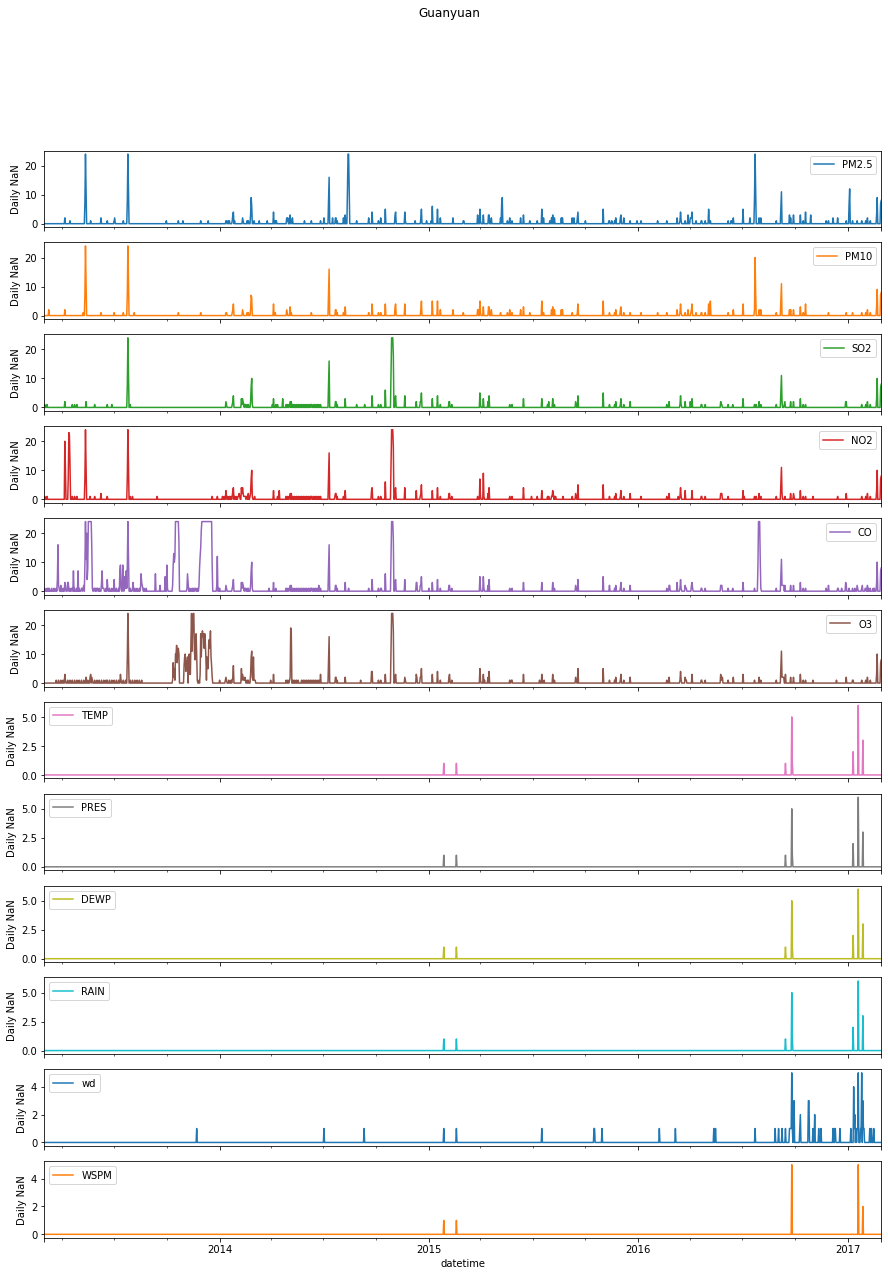

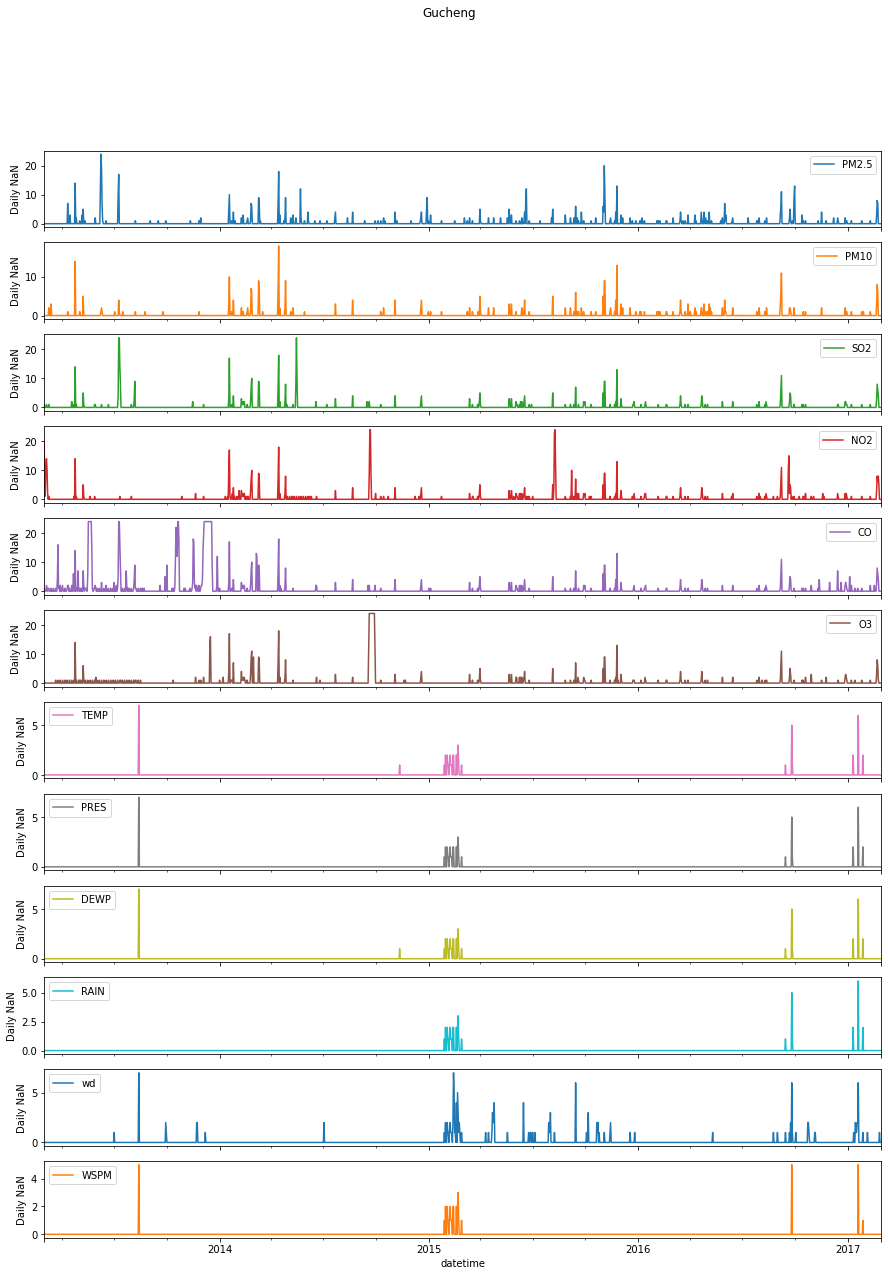

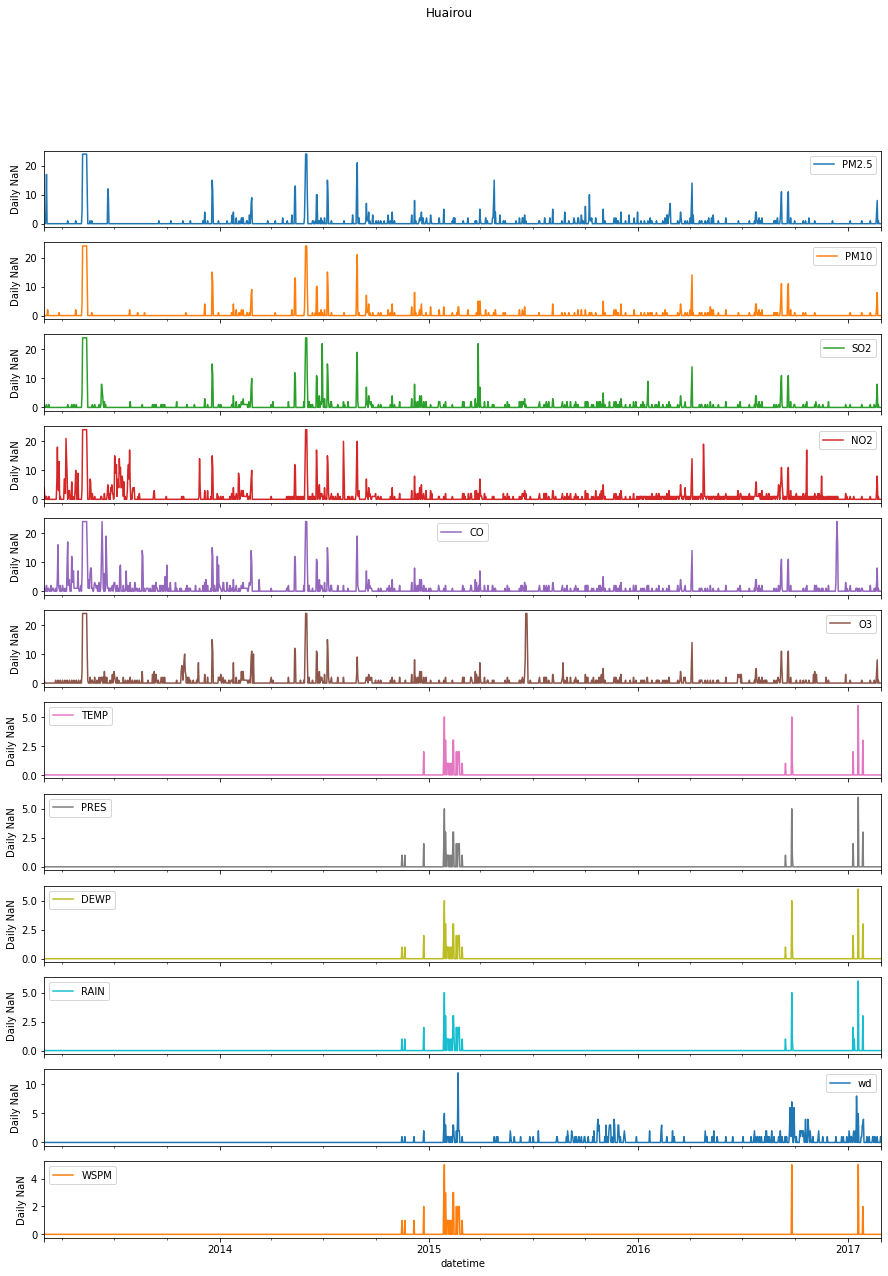

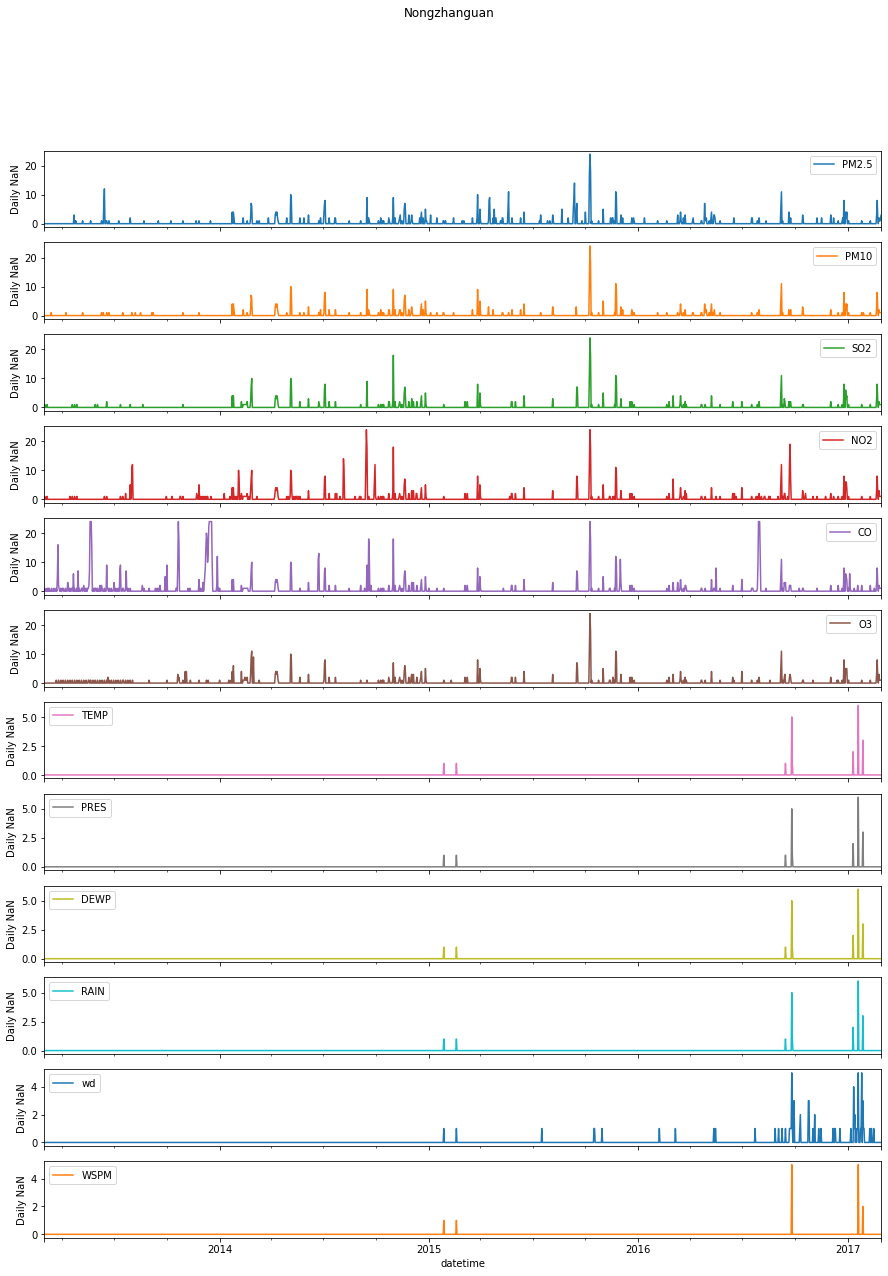

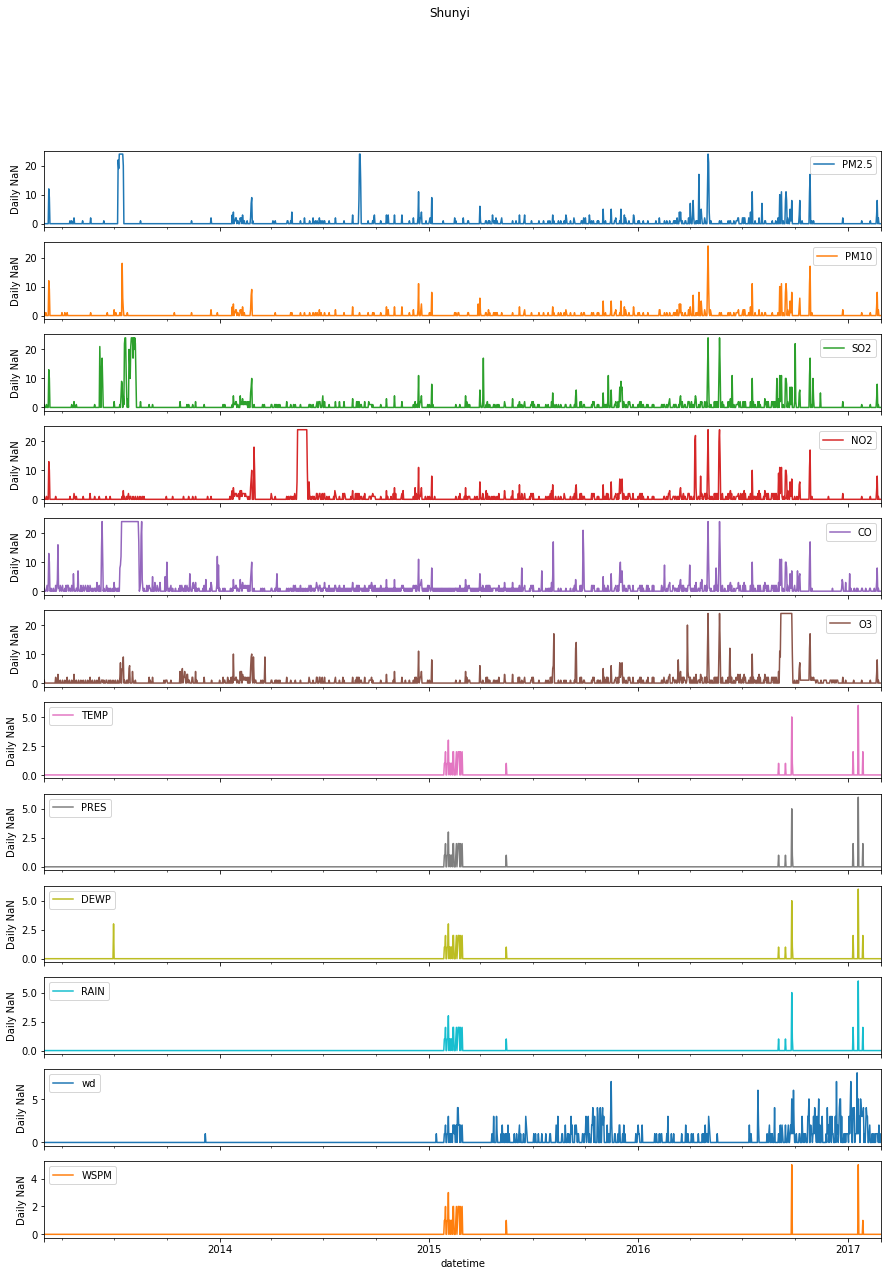

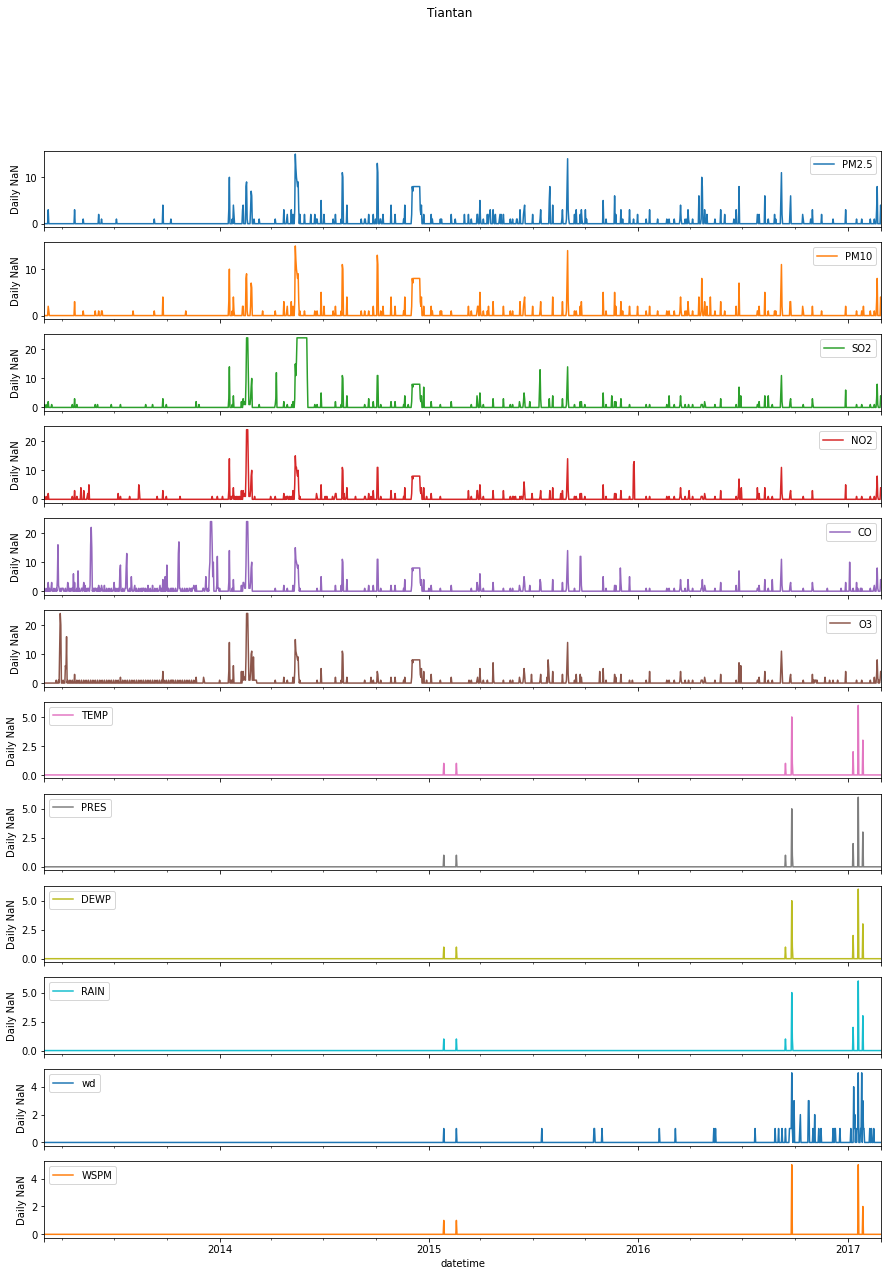

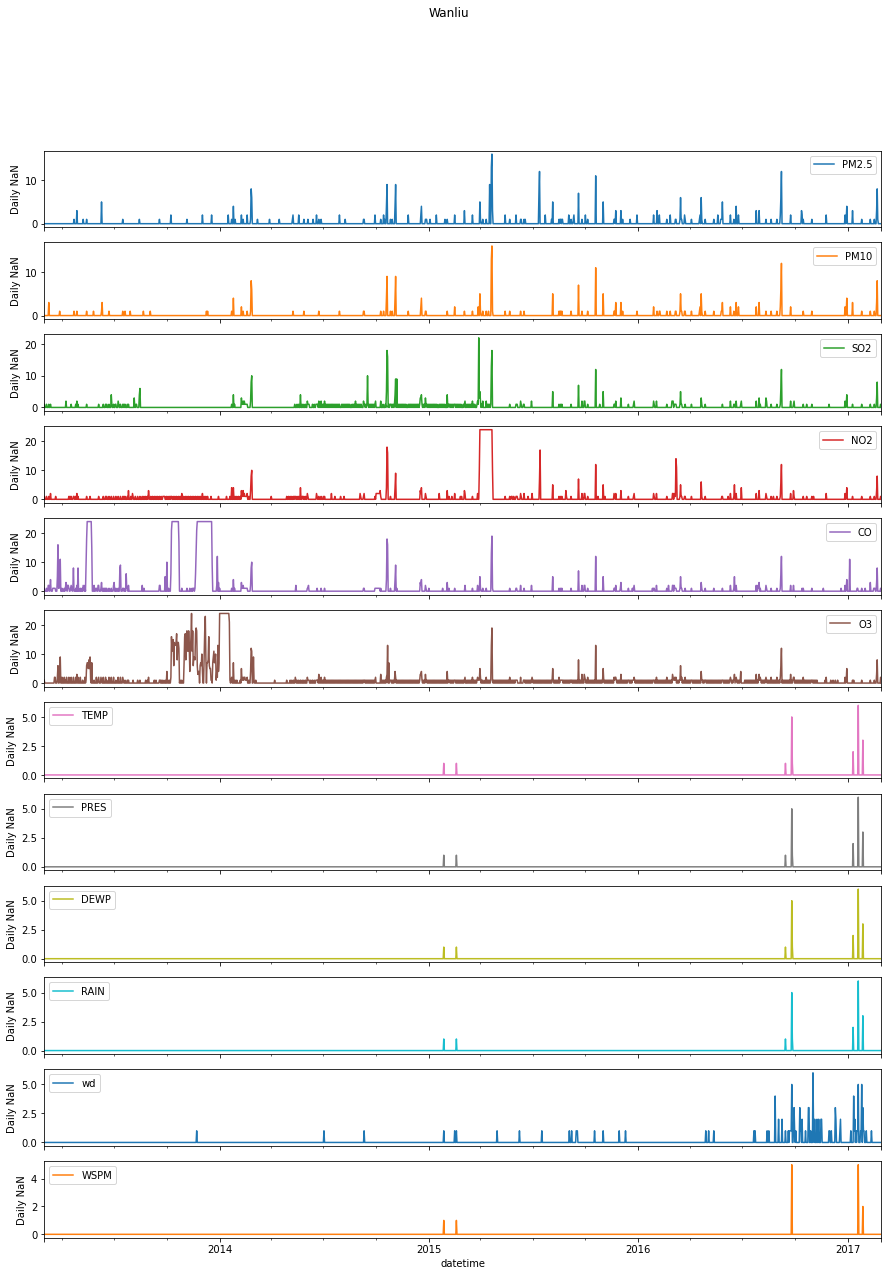

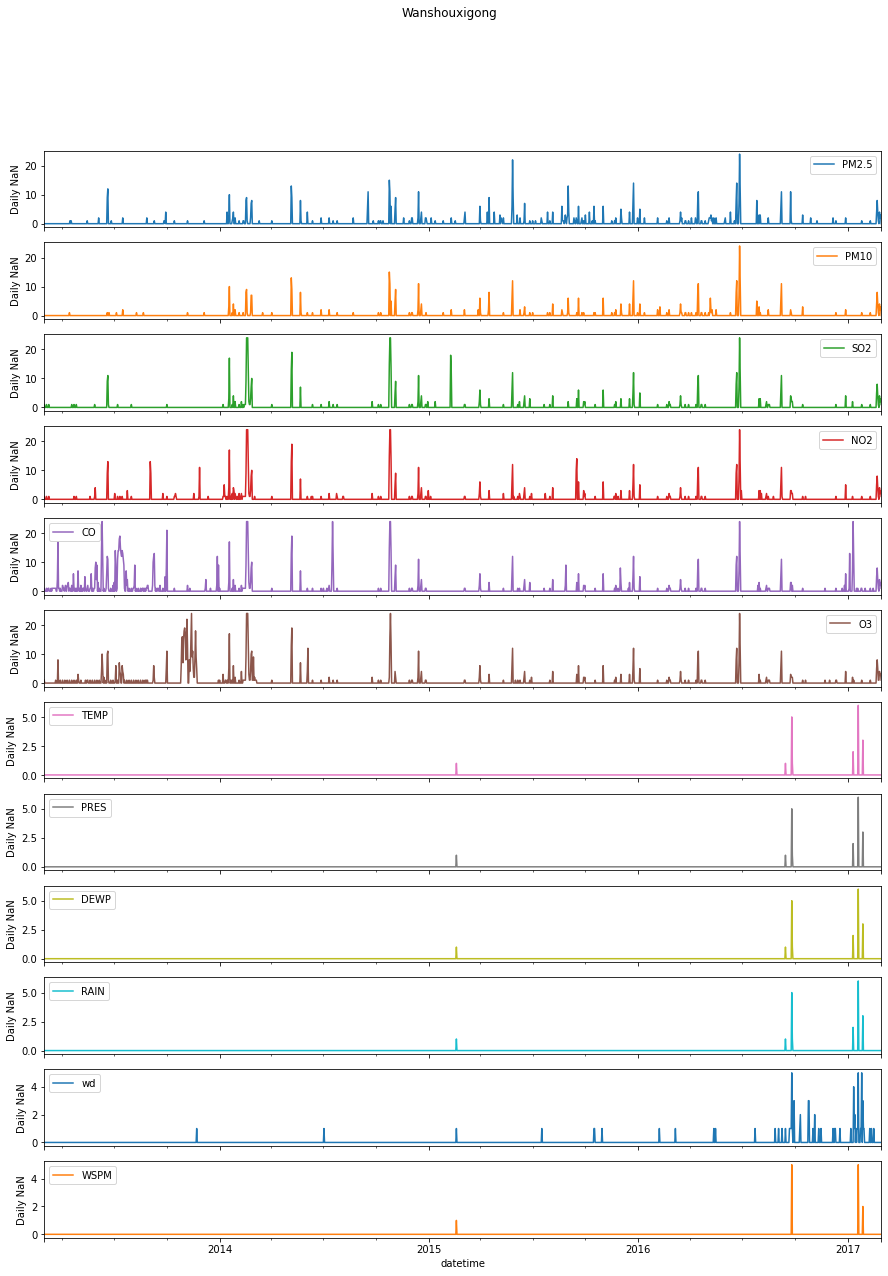

In [5]:
cols_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM']

for k in na_dic.keys():
    axes = na_dic[k][cols_plot].resample("D").sum().plot(figsize=(15, 20), subplots=True, title=k)
    for ax in axes:
        ax.set_ylabel('Daily NaN')
    filename=k+"missing.jpg"
    plt.savefig(filename)

<h3>Cleaning Analysis Cont.</h3>
<p>The pervious charts show there are occasional but rare multi-day gaps in data. For pollution, most gaps are a few hours per day. There is no pattern to the missing data. For weather fields, the gaps are much smaller and do seem to go out around the same time for an individual station.</p>
<p>Next we charted all station data together per field to examine patterns between stations. This much data was difficult to visualize for 12 stations. A one year period is graphed here to make the charts more readable. </p>
<h4>The following sections have many repetitive charts. The casual reader may scroll through to the next text section. All charts are included here to show our cleaning process</h4>


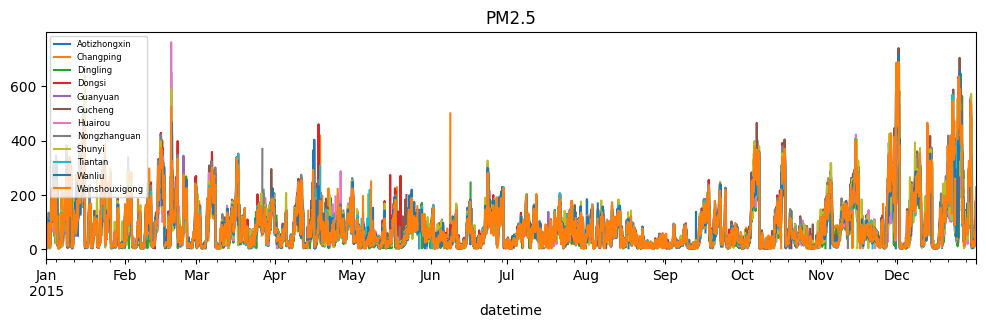

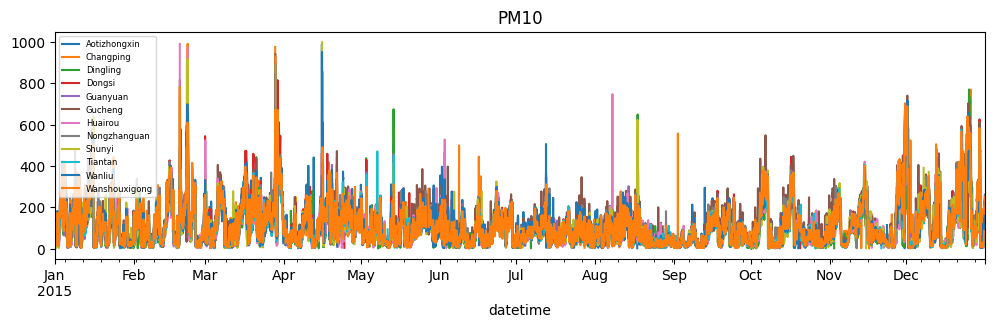

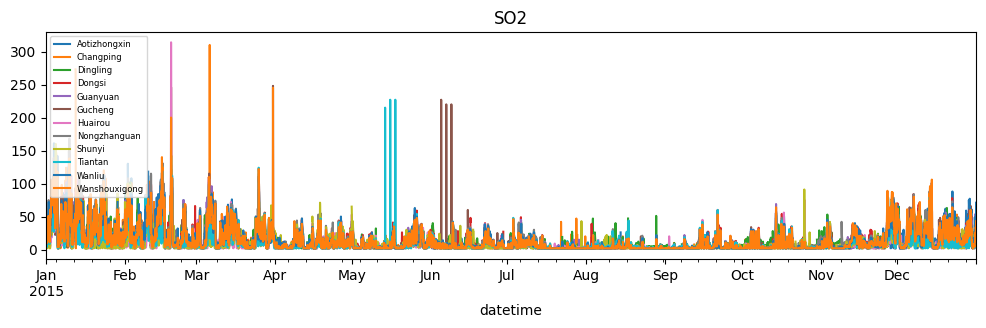

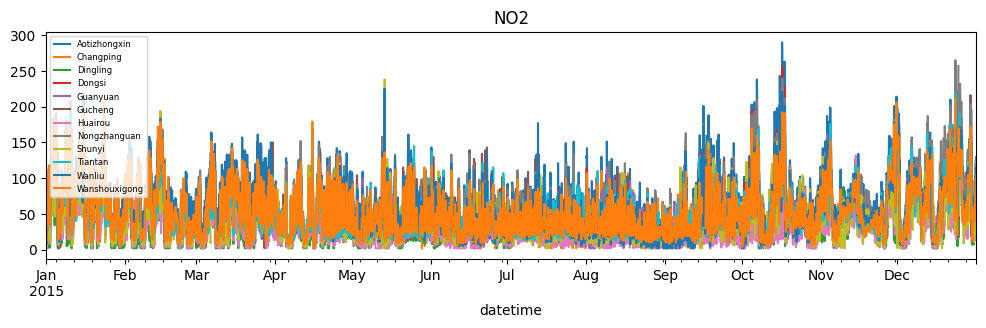

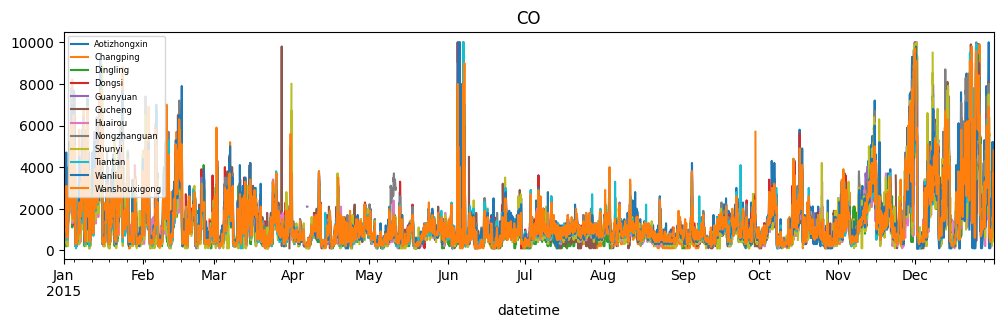

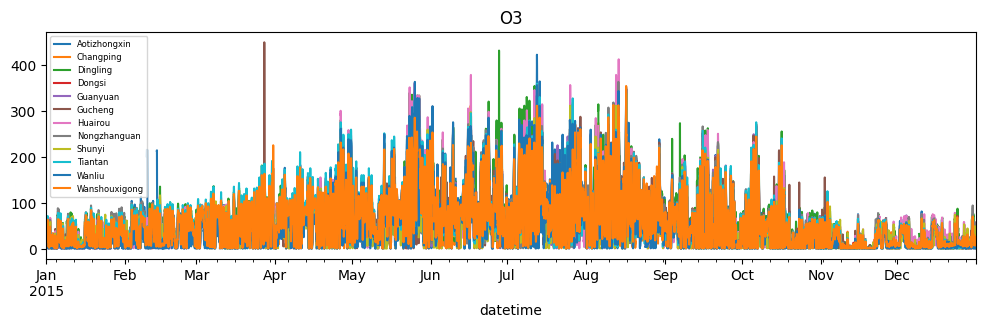

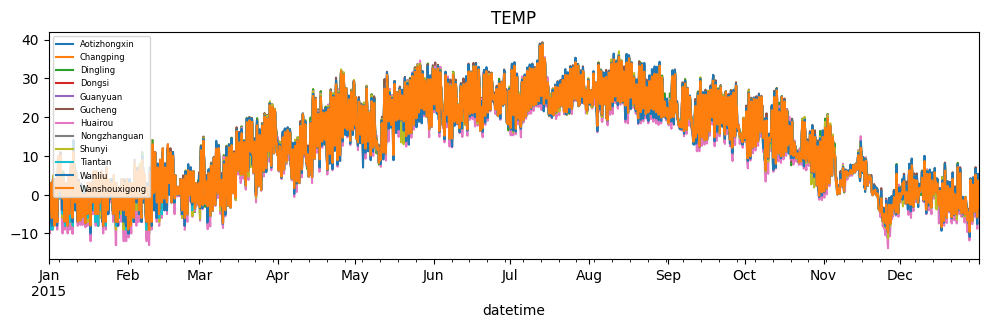

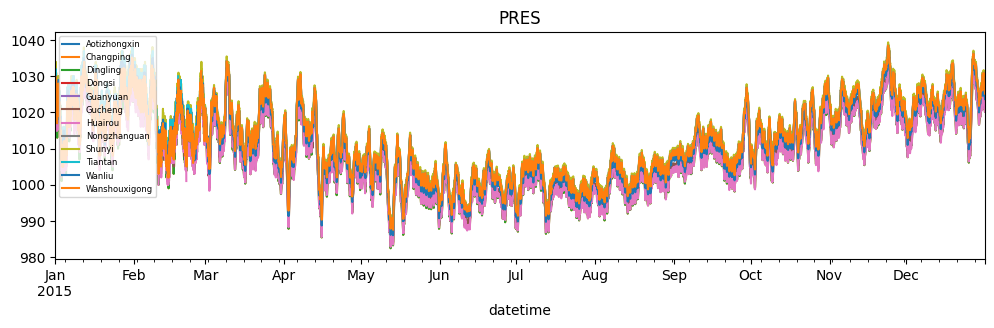

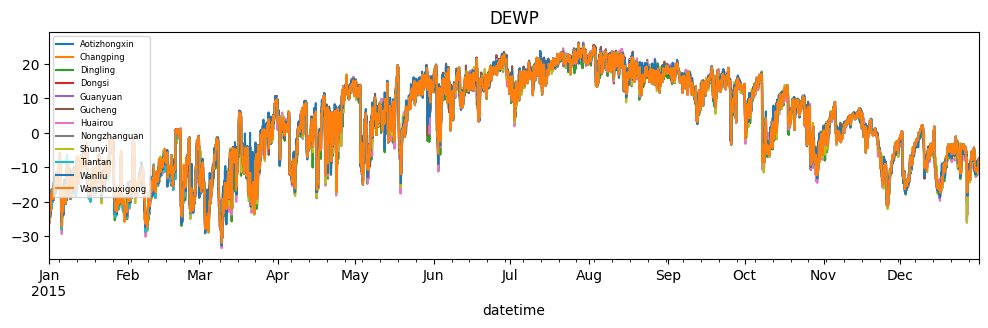

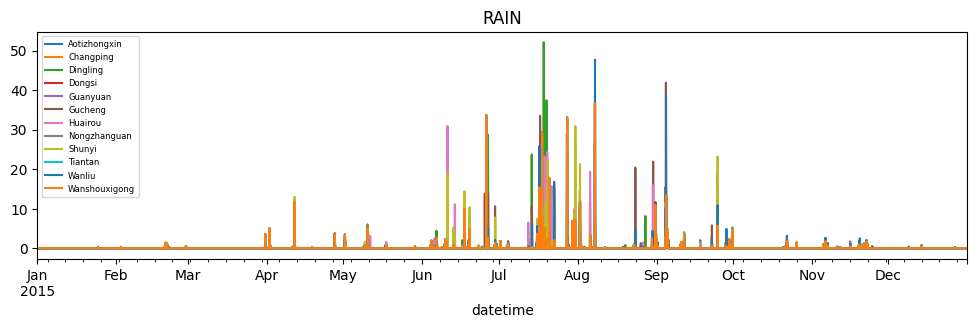

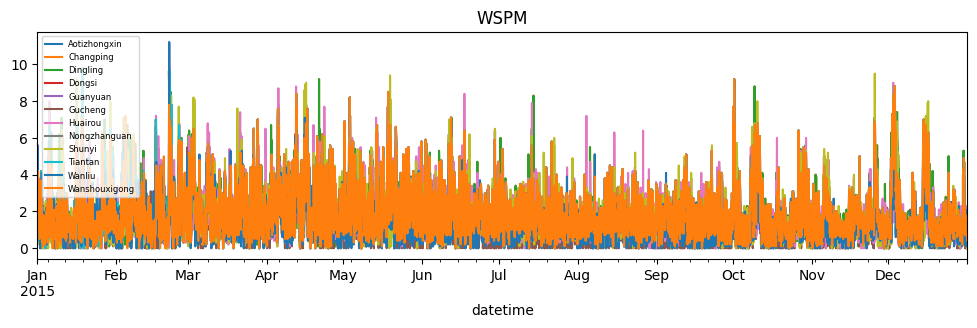

In [6]:
#plot original data for year 2015.

cols_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM']
for c in cols_plot:
    plt.figure(figsize=(12, 3), dpi=100)
    for k in dic.keys():
        dic[k][c].loc["2015"].plot(label=k)
    
    plt.title(c)
    plt.legend(loc=2, prop={'size': 6})
    filename="allstations-"+c+".jpg"
    plt.savefig(filename)

<h3>Cleaning Analysis Cont.</h3>
<p>The pervious charts show each station has distinct pollution and weather ranges and patterns. Using data from one station to fill missing data in another may not be the right approach here. The data also changes seasonally. Using a static value to fill missing fields like an average would not be a great option either. Since data gaps do not always occur at the same time, dropping the entire row would remove a lot of good data from our analysis.</p>
<p>The best option to fill missing values is the pandas interpolate function. For continuous data, this fills missing values with linear interpolation. Graphically, this would be a straight line between the first and last available datapoints between the missing data.</p>

<p>https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation</p>



In [7]:
dic_clean={}
for k in dic.keys():
    dic[k][cols_plot]=dic[k][cols_plot].interpolate()

df_na = pd.DataFrame(index=[dic['Aotizhongxin'].columns])
for k in dic.keys():
    ser=dic[k].isna().sum()
    df_na[k]=ser.values
df_na

Aotizhongxin  Changping  Dingling  Dongsi  Guanyuan  Gucheng  \
PM2.5                 0          0         0       0         0        0   
PM10                  0          0         0       0         0        0   
SO2                   0          0         0       0         0        0   
NO2                   0          0         2       0         0       20   
CO                    0          0         0       0         0        0   
O3                    0          0         0       0         0        0   
TEMP                  0          0         0       0         0        0   
PRES                  0          0         0       0         0        0   
DEWP                  0          0         0       0         0        0   
RAIN                  0          0         0       0         0        0   
wd                   81        140       140      78        81      159   
WSPM                  0          0         0       0         0        0   
station               0          0         0       0         0        0   
datetime              0          0         0       0         0        0   
PM2.5 Sig             0          0         0       0         0        0   

           Huairou  Nongzhanguan  Shunyi  Tiantan  Wanliu  Wanshouxigong  
PM2.5            0             0       0        0       0              0  
PM10             0             0       0        0       0              0  
SO2              0             0       0        0       0              0  
NO2              0             0       0        0       0              0  
CO               0             0       0        0       0              0  
O3               0             0       0        0       0              0  
TEMP             0             0       0        0       0              0  
PRES             0             0       0        0       0              0  
DEWP             0             0       0        0       0              0  
RAIN             0             0       0        0       0              0  
wd             302            78     483       78     123             79  
WSPM             0             0       0        0       0              0  
station          0             0       0        0       0              0  
datetime         0             0       0        0       0              0  
PM2.5 Sig        0             0       0        0       0              0

In [8]:
#find why the interporlate didn't work for some values
print('Gucheng')
print(dic['Gucheng']['NO2'][dic['Gucheng']['NO2'].isna()])
print('Dingling')
print(dic['Dingling']['NO2'][dic['Dingling']['NO2'].isna()])

Gucheng
datetime
2013-03-01 00:00:00   NaN
2013-03-01 01:00:00   NaN
2013-03-01 02:00:00   NaN
2013-03-01 03:00:00   NaN
2013-03-01 04:00:00   NaN
2013-03-01 05:00:00   NaN
2013-03-01 06:00:00   NaN
2013-03-01 07:00:00   NaN
2013-03-01 08:00:00   NaN
2013-03-01 09:00:00   NaN
2013-03-01 10:00:00   NaN
2013-03-01 11:00:00   NaN
2013-03-01 12:00:00   NaN
2013-03-01 13:00:00   NaN
2013-03-01 14:00:00   NaN
2013-03-01 15:00:00   NaN
2013-03-01 16:00:00   NaN
2013-03-01 17:00:00   NaN
2013-03-01 18:00:00   NaN
2013-03-01 19:00:00   NaN
Name: NO2, dtype: float64
Dingling
datetime
2013-03-01 00:00:00   NaN
2013-03-01 01:00:00   NaN
Name: NO2, dtype: float64


<h3>Cleaning Analysis Cont.</h3>
<p>Some missing data remains after interpolate. Wind Direction is a string, not continuous so that does not work here. The continuous fields had some missing data at the begging of the dataframe, so there was no reference point for a linear fill. For all these fields, we used backfill to use the first available data and copy backwards for all nan values.<p>

In [9]:
#both are empty at the begining of the series, so let's backwards replace with the first available value. We can do this with wind direction too. 
for k in dic.keys():
    dic[k].fillna(method="backfill", inplace=True)

df_na = pd.DataFrame(index=[dic['Aotizhongxin'].columns])
for k in dic.keys():
    ser=dic[k].isna().sum()
    df_na[k]=ser.values
    
#Check if any NaN values remain
df_na

Aotizhongxin  Changping  Dingling  Dongsi  Guanyuan  Gucheng  \
PM2.5                 0          0         0       0         0        0   
PM10                  0          0         0       0         0        0   
SO2                   0          0         0       0         0        0   
NO2                   0          0         0       0         0        0   
CO                    0          0         0       0         0        0   
O3                    0          0         0       0         0        0   
TEMP                  0          0         0       0         0        0   
PRES                  0          0         0       0         0        0   
DEWP                  0          0         0       0         0        0   
RAIN                  0          0         0       0         0        0   
wd                    0          0         0       0         0        0   
WSPM                  0          0         0       0         0        0   
station               0          0         0       0         0        0   
datetime              0          0         0       0         0        0   
PM2.5 Sig             0          0         0       0         0        0   

           Huairou  Nongzhanguan  Shunyi  Tiantan  Wanliu  Wanshouxigong  
PM2.5            0             0       0        0       0              0  
PM10             0             0       0        0       0              0  
SO2              0             0       0        0       0              0  
NO2              0             0       0        0       0              0  
CO               0             0       0        0       0              0  
O3               0             0       0        0       0              0  
TEMP             0             0       0        0       0              0  
PRES             0             0       0        0       0              0  
DEWP             0             0       0        0       0              0  
RAIN             0             0       0        0       0              0  
wd               0             0       0        0       0              0  
WSPM             0             0       0        0       0              0  
station          0             0       0        0       0              0  
datetime         0             0       0        0       0              0  
PM2.5 Sig        0             0       0        0       0              0

In [10]:
#combine all data into one dataframe
#use df for master dataframe of all clean data
#use dic_clean for dictionary of each station dataset. Keys are the station name like dic_clean['Aotizhongxin']
df = pd.concat(dic.values())
df.head()

PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
datetime                                                                        
2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   
2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   
2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   
2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   
2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   

                     RAIN   wd  WSPM       station            datetime  \
datetime                                                                 
2013-03-01 00:00:00   0.0  NNW   4.4  Aotizhongxin 2013-03-01 00:00:00   
2013-03-01 01:00:00   0.0    N   4.7  Aotizhongxin 2013-03-01 01:00:00   
2013-03-01 02:00:00   0.0  NNW   5.6  Aotizhongxin 2013-03-01 02:00:00   
2013-03-01 03:00:00   0.0   NW   3.1  Aotizhongxin 2013-03-01 03:00:00   
2013-03-01 04:00:00   0.0    N   2.0  Aotizhongxin 2013-03-01 04:00:00   

                     PM2.5 Sig  
datetime                        
2013-03-01 00:00:00          0  
2013-03-01 01:00:00          0  
2013-03-01 02:00:00          0  
2013-03-01 03:00:00          0  
2013-03-01 04:00:00          0

<h3>Data Analysis and Visualization</h3>

To inspect the relation between PM10 and PM2.5, we plotted PM10 vs PM2.5 at each station. There seems to be an obvious linear trend within a certain band of concentrations. There seems to be a clustering of non-linearity at higher concentrations of PM10. This indicates that a k-nearest neighbor or CART analysis would be appropriate. To further investigate this relationship, we generate a few more series of plots.  

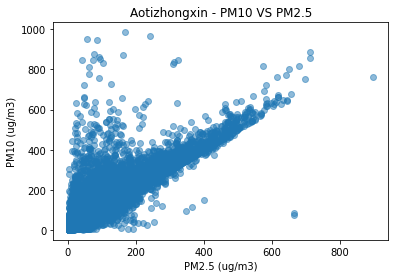

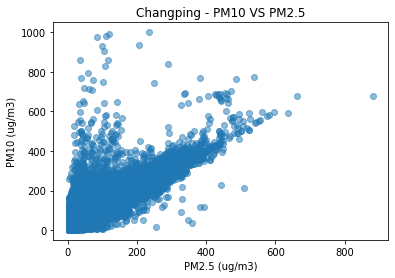

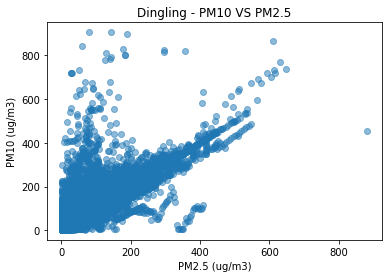

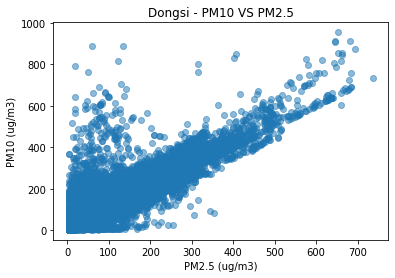

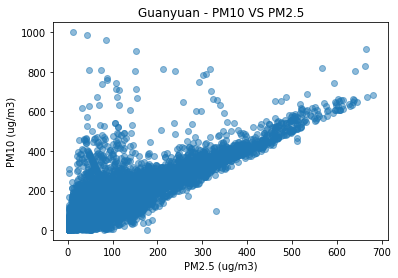

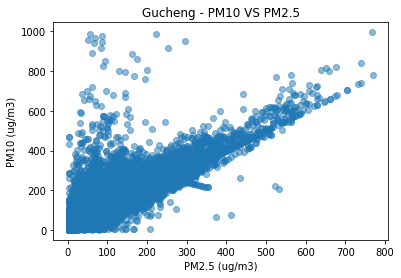

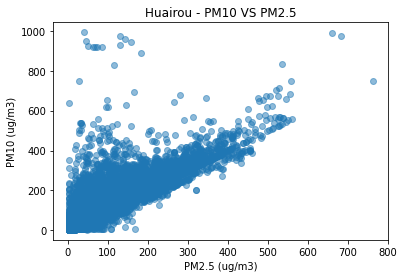

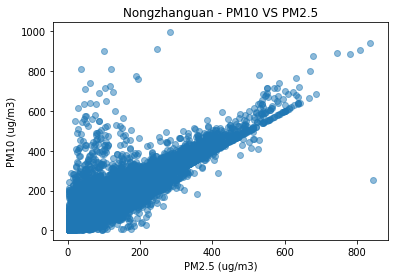

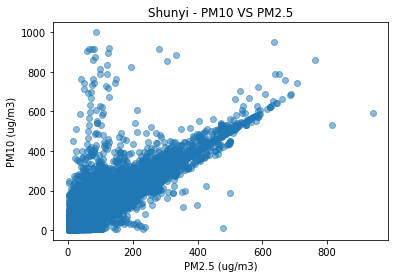

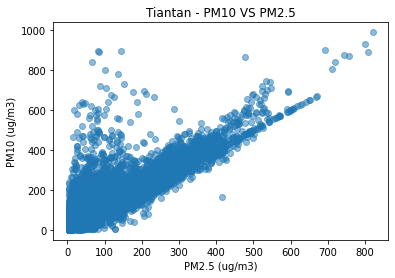

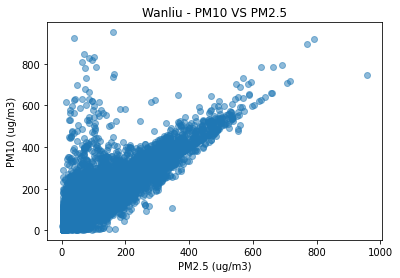

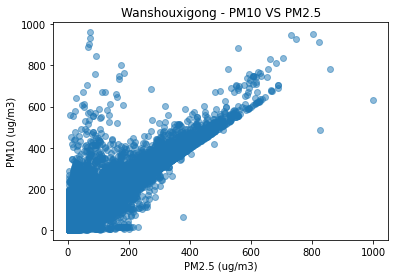

In [11]:
for k in dic.keys():
    scatter = plt.scatter(dic[k]['PM2.5'], dic[k]['PM10'], alpha= 0.5)
    plt.title(f'{k} - PM10 VS PM2.5')
    plt.xlabel('PM2.5 (ug/m3)')
    plt.ylabel('PM10 (ug/m3)')
    filename=k+" PM10 vs PM2.5.jpg"
    plt.savefig(filename)
    plt.show()

Next, we plotted wind speed vs PM10 concentration grouped by the PM2.5 level for each station. The PM2.5 level is set to 0 if the concentration is 'safe' (less than 35 micrograms per cubic meter) and 1 if the concentration is 'unsafe' (greater than 35). The purpose of this was to inspect the potential impact of wind on the PM10 and PM2.5 concentrations. The pattern that appears is that PM10 levels seem to drop more at higher wind speeds than PM2.5. 

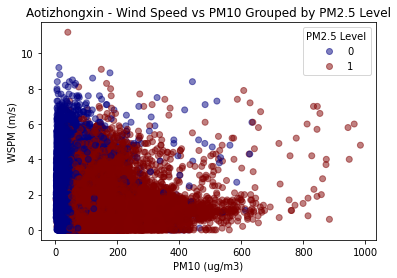

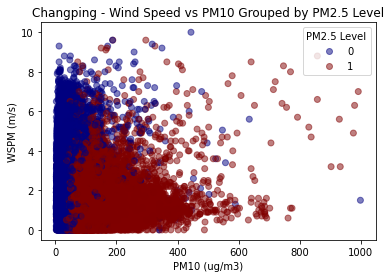

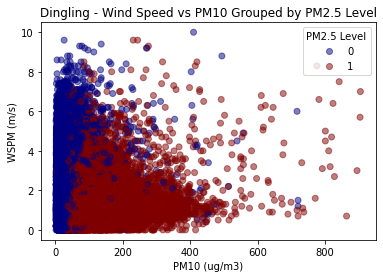

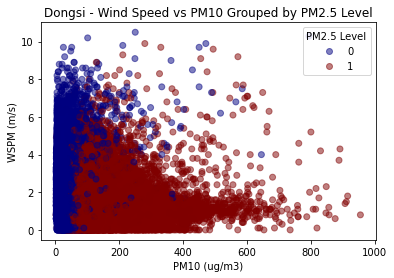

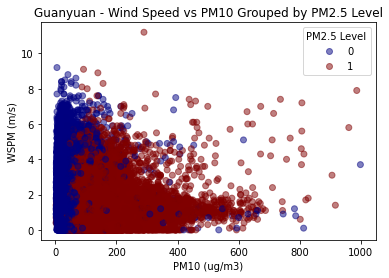

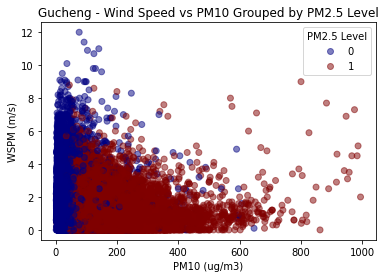

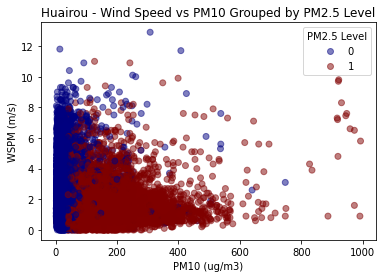

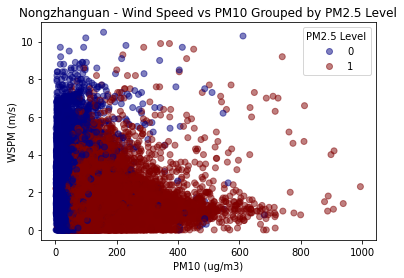

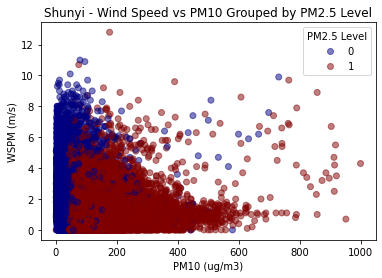

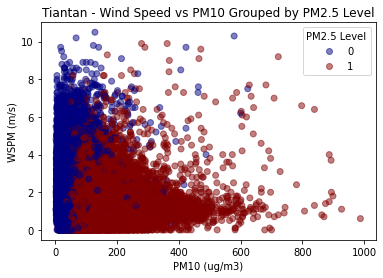

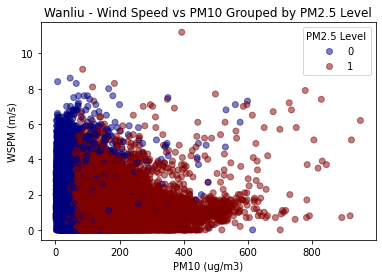

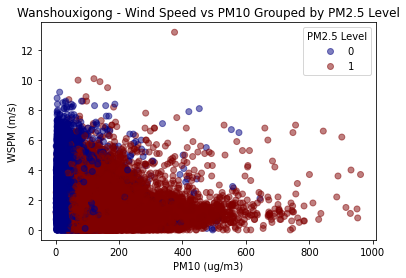

In [12]:
sp_names = [0,1]
for k in dic.keys():
    scatter = plt.scatter(dic[k]['PM10'], dic[k]['WSPM'], c= dic[k]['PM2.5 Sig'], cmap=('jet'), alpha= 0.5)
    plt.legend(handles=scatter.legend_elements()[0], labels = sp_names, title="PM2.5 Level")
    plt.title(f'{k} - Wind Speed vs PM10 Grouped by PM2.5 Level')
    plt.xlabel('PM10 (ug/m3)')
    plt.ylabel('WSPM (m/s)')
    filename=k+" Wind Speed vs PM10 Grouped by PM2.5.jpg"
    plt.savefig(filename)
    plt.show()
 

We then plotted PM2.5 and PM10 at the 'Aotizhongxin' station vs all other stations. The goal was to observe the relative concentrations of PM2.5 and PM10 at different stations throughout time. If there were times of higher wind - and wind impacts PM10 and PM2.5 differently - we would expect to see more variation in one plot than the other. The theory being that if higher wind speed / direction impacts one of these variables more than the other, we should see spikes in one at one station and a corresponding drop in another as the particles move around space - leading to more variation in the scatterplots. The plots do not make it obviously clear, but there is greater spread / inconsitency in the PM10 vs the PM2.5 plots, suggesting once again that PM10 may be more impacted by wind.  

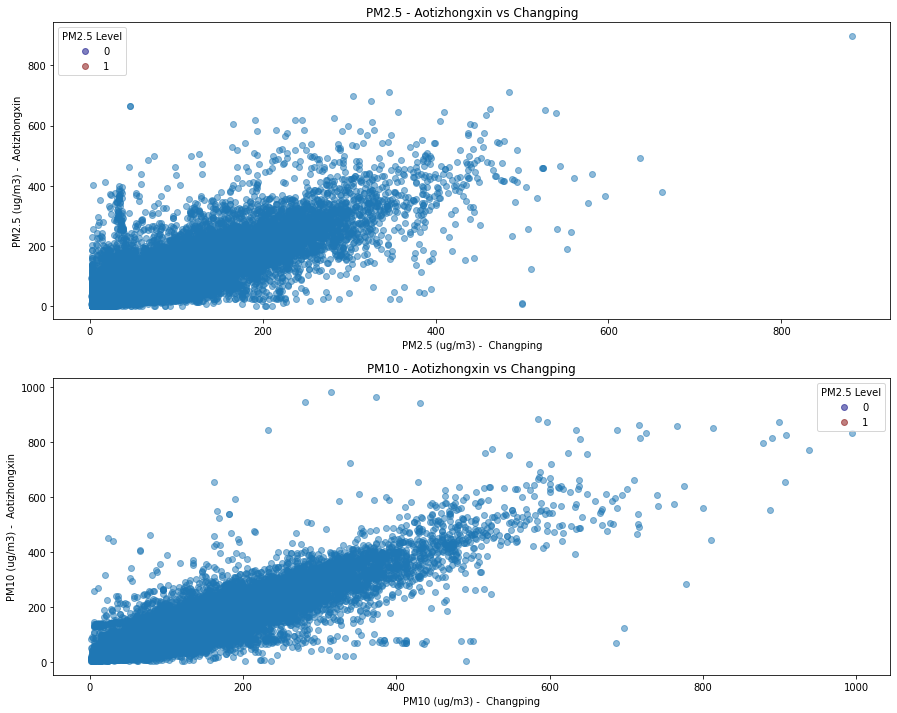

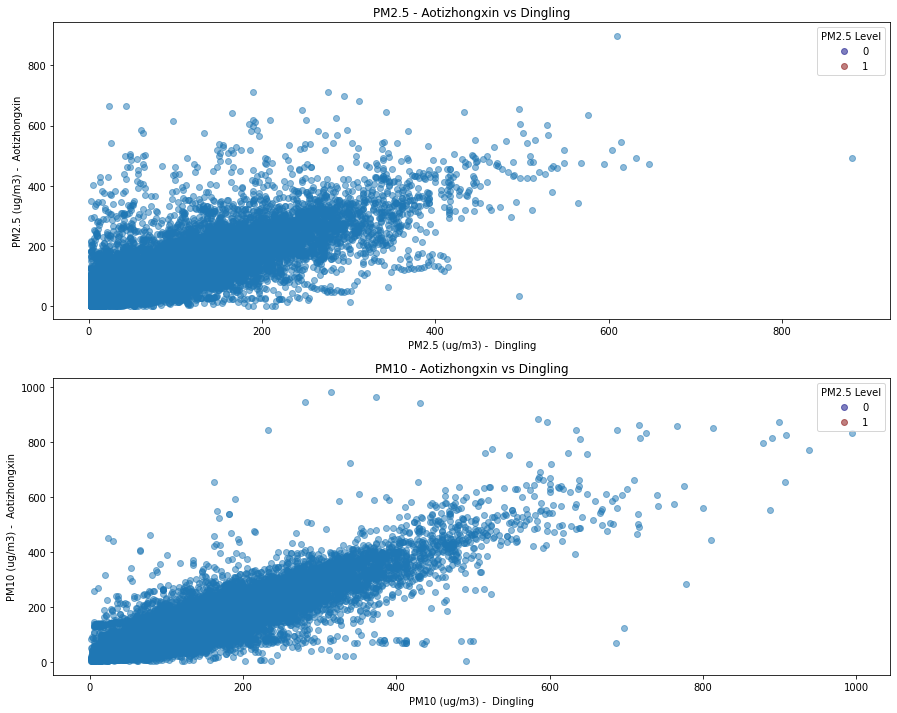

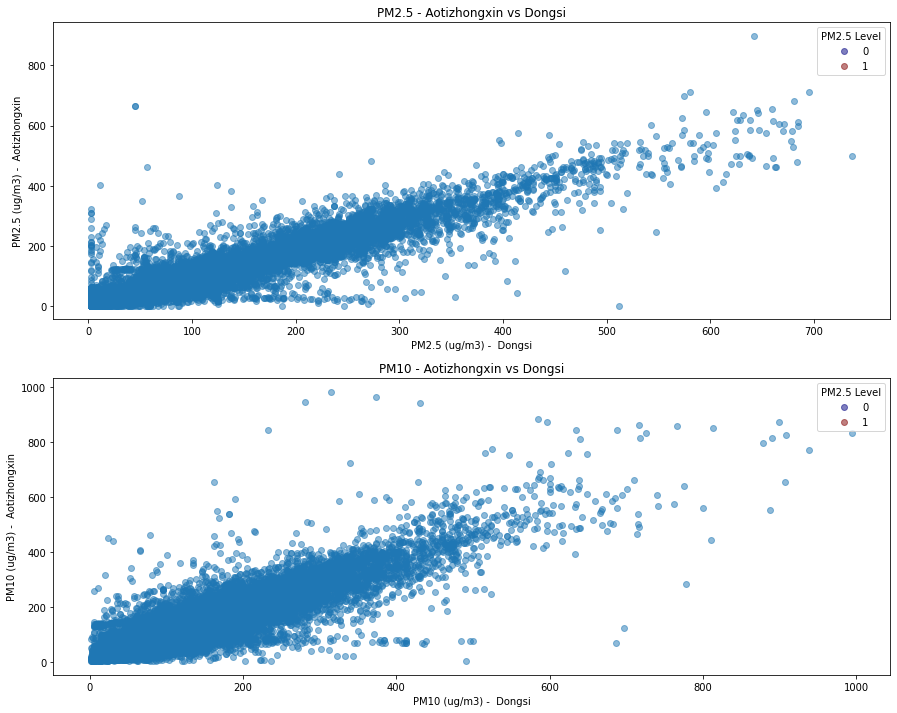

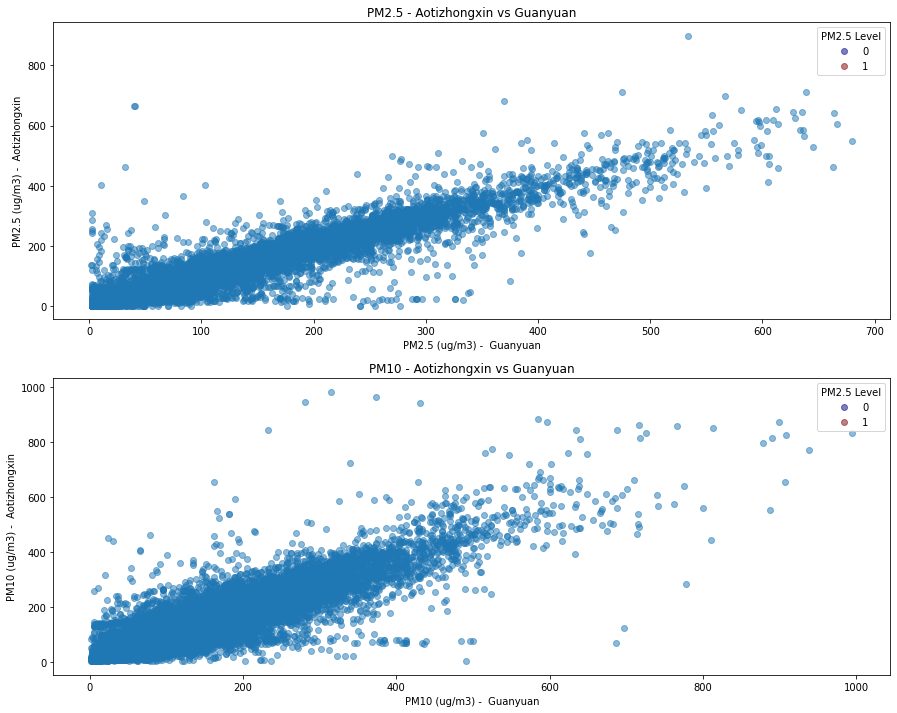

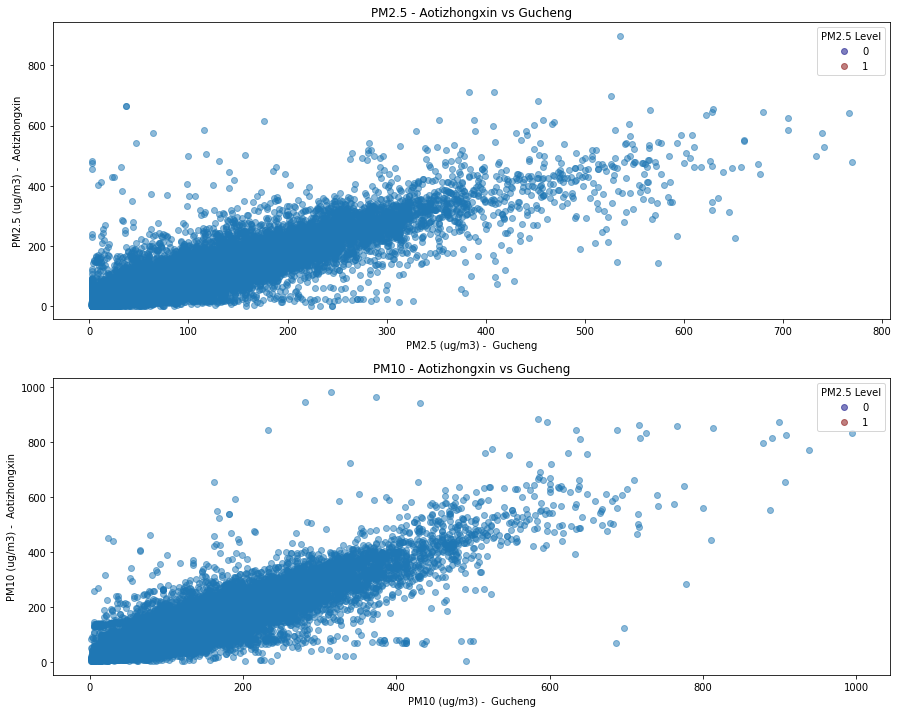

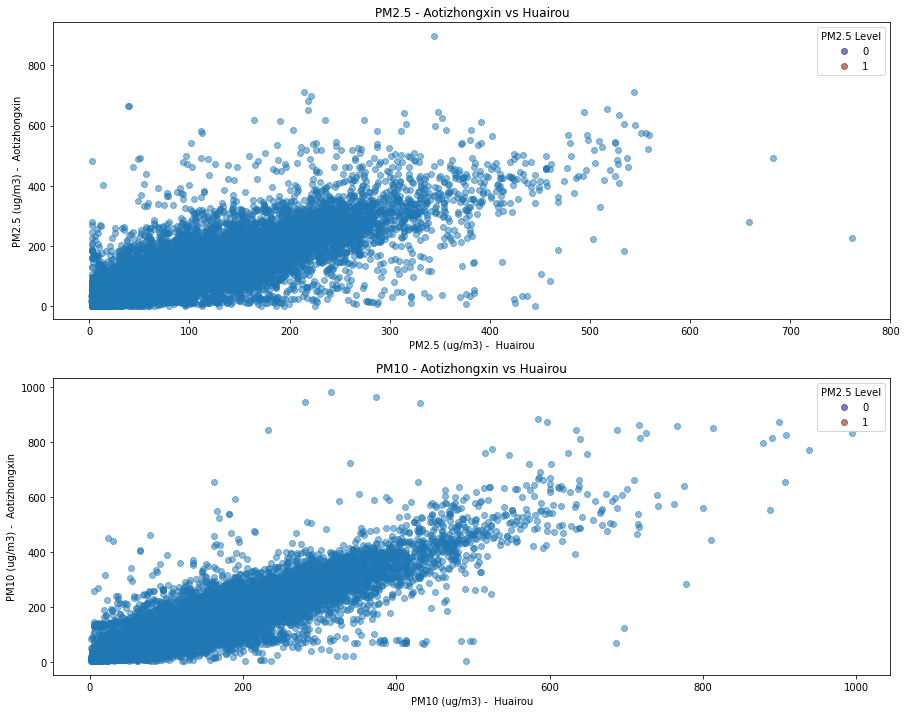

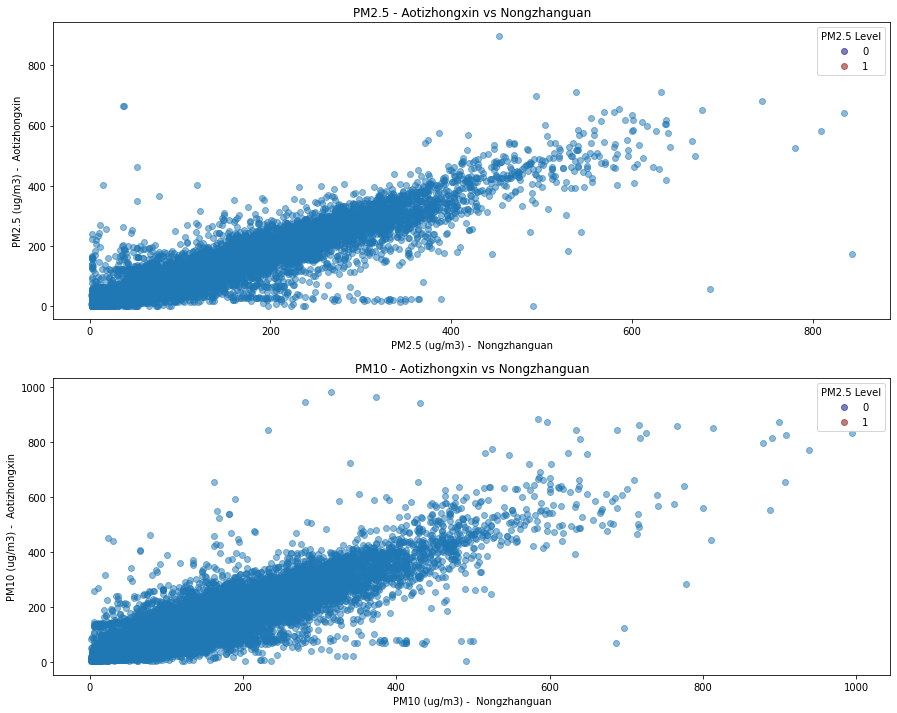

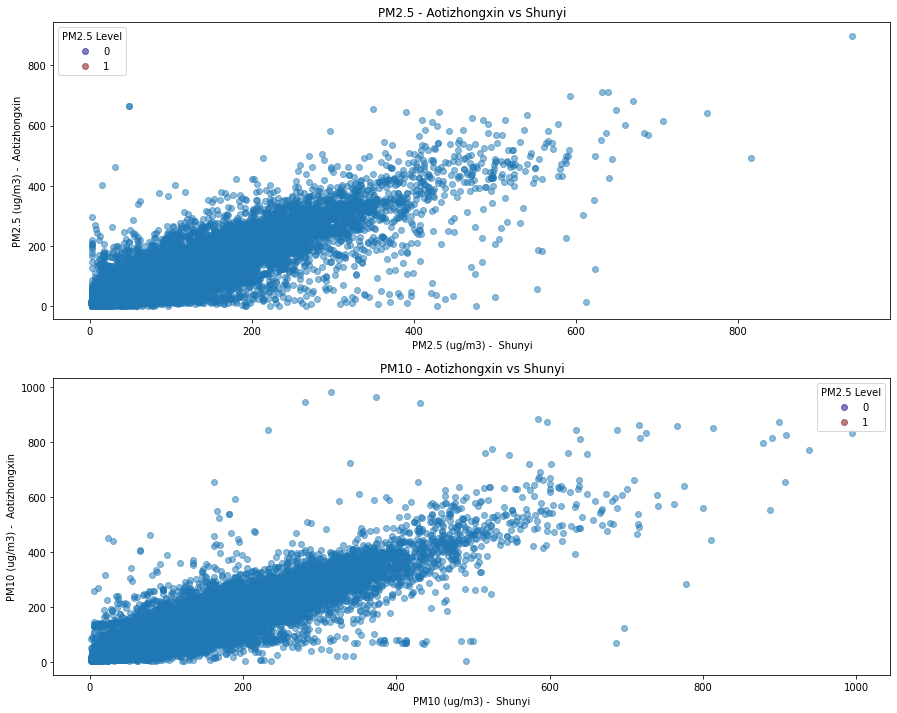

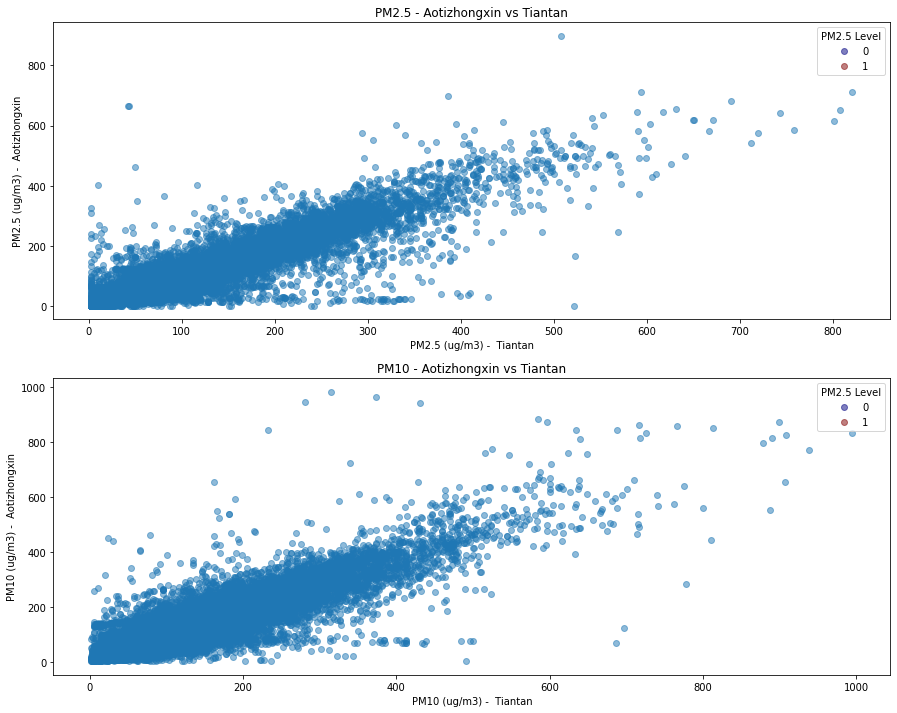

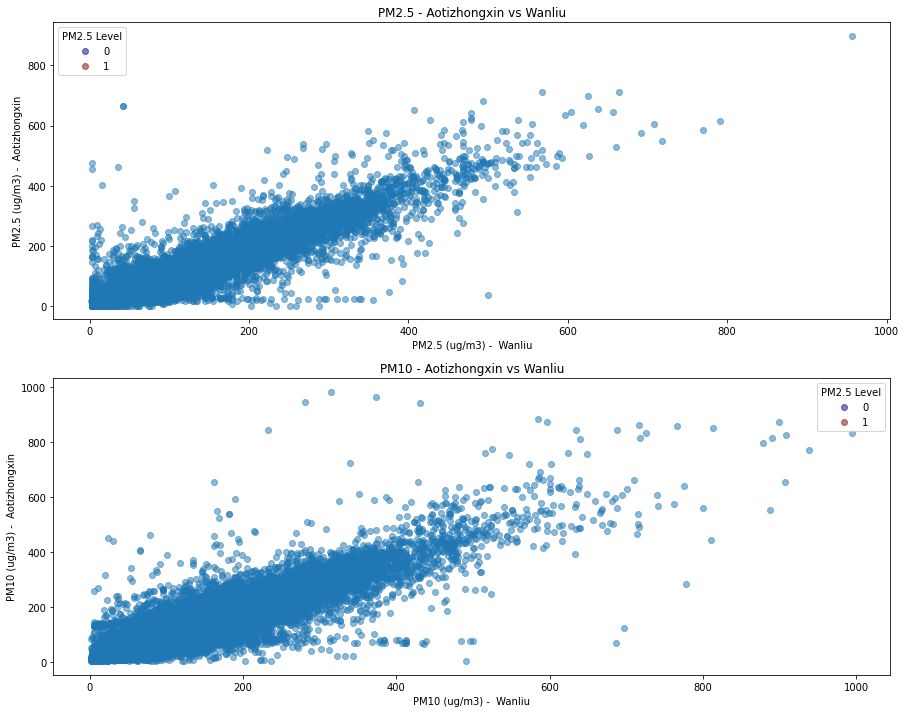

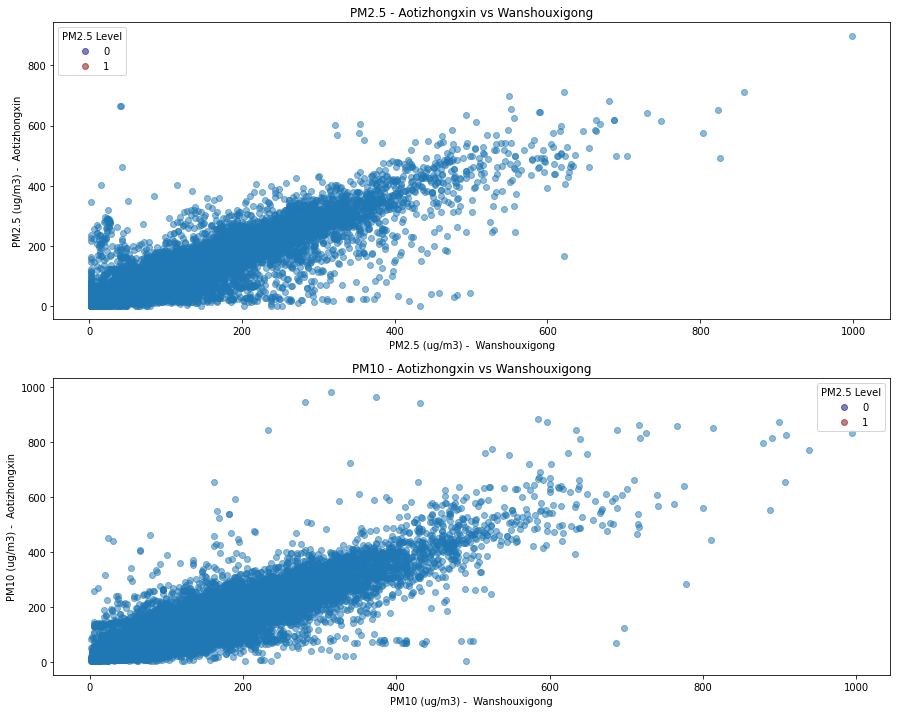

In [13]:

for k in dic.keys():
    if k != 'Aotizhongxin':
        fig, axs = plt.subplots(2, figsize = (15,12))
        axs[0].scatter(dic[k]['PM2.5'], dic['Aotizhongxin']['PM2.5'], alpha= 0.5)
        axs[0].legend(handles=scatter.legend_elements()[0], labels = sp_names, title="PM2.5 Level")
        axs[0].set_title(f'PM2.5 - Aotizhongxin vs {k}')
        axs[0].set_xlabel(f'PM2.5 (ug/m3) -  {k}')
        axs[0].set_ylabel('PM2.5 (ug/m3) -  Aotizhongxin')
        axs[1].scatter(dic['Nongzhanguan']['PM10'], dic['Aotizhongxin']['PM10'], alpha= 0.5)
        axs[1].legend(handles=scatter.legend_elements()[0], labels = sp_names, title="PM2.5 Level")
        axs[1].set_title(f'PM10 - Aotizhongxin vs {k}')
        axs[1].set_xlabel(f'PM10 (ug/m3) -  {k}')
        axs[1].set_ylabel('PM10 (ug/m3) -  Aotizhongxin')
        filename=k+" vs Aotizhongxin - PM10 and PM2.5.jpg"
        plt.savefig(filename)